
## A survey was conducted on 1525 voters with 9 variables. Building a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import zscore


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

In [5]:
!pip install xgboost

In [2]:
import xgboost as xgb


## Data Ingestion:

### Descriptive statistics and null value condition check.

In [111]:
df = pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes')

In [112]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [47]:
df.shape

(1525, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [49]:
df.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [50]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [55]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [56]:
df.quantile(0.75)-df.quantile(0.25)

Unnamed: 0                 762.0
age                         26.0
economic.cond.national       1.0
economic.cond.household      1.0
Blair                        2.0
Hague                        2.0
Europe                       6.0
political.knowledge          2.0
dtype: float64

In [57]:
df.var()

Unnamed: 0                 193929.166667
age                           246.842075
economic.cond.national          0.776107
economic.cond.household         0.864810
Blair                           1.380212
Hague                           1.514631
Europe                         10.873759
political.knowledge             1.173571
dtype: float64

In [58]:
df.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

## Performing Univariate, Bivariate and exploratory data analysis with checks on Outliers.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

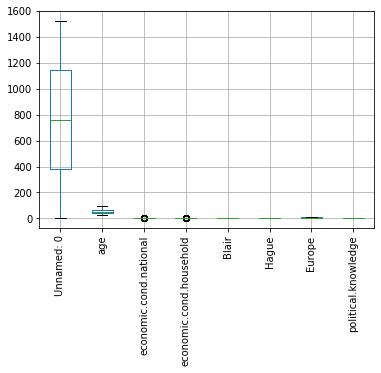

In [65]:
df.boxplot()
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4F08AC988>,
      dtype=object)

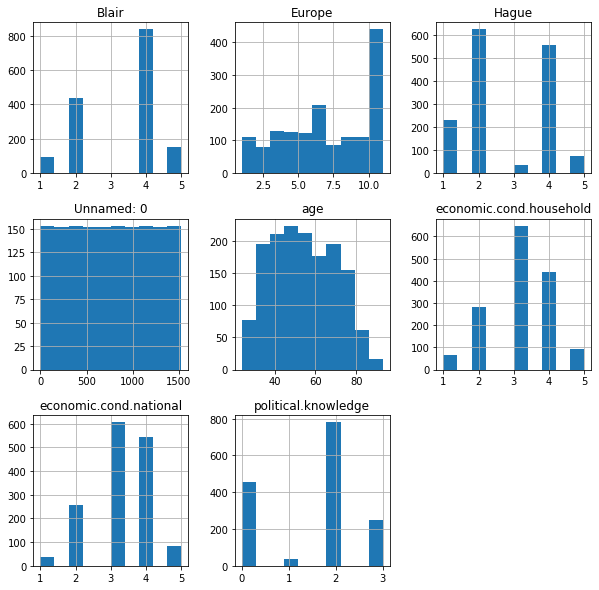

In [64]:
df.hist(figsize=(10,10))

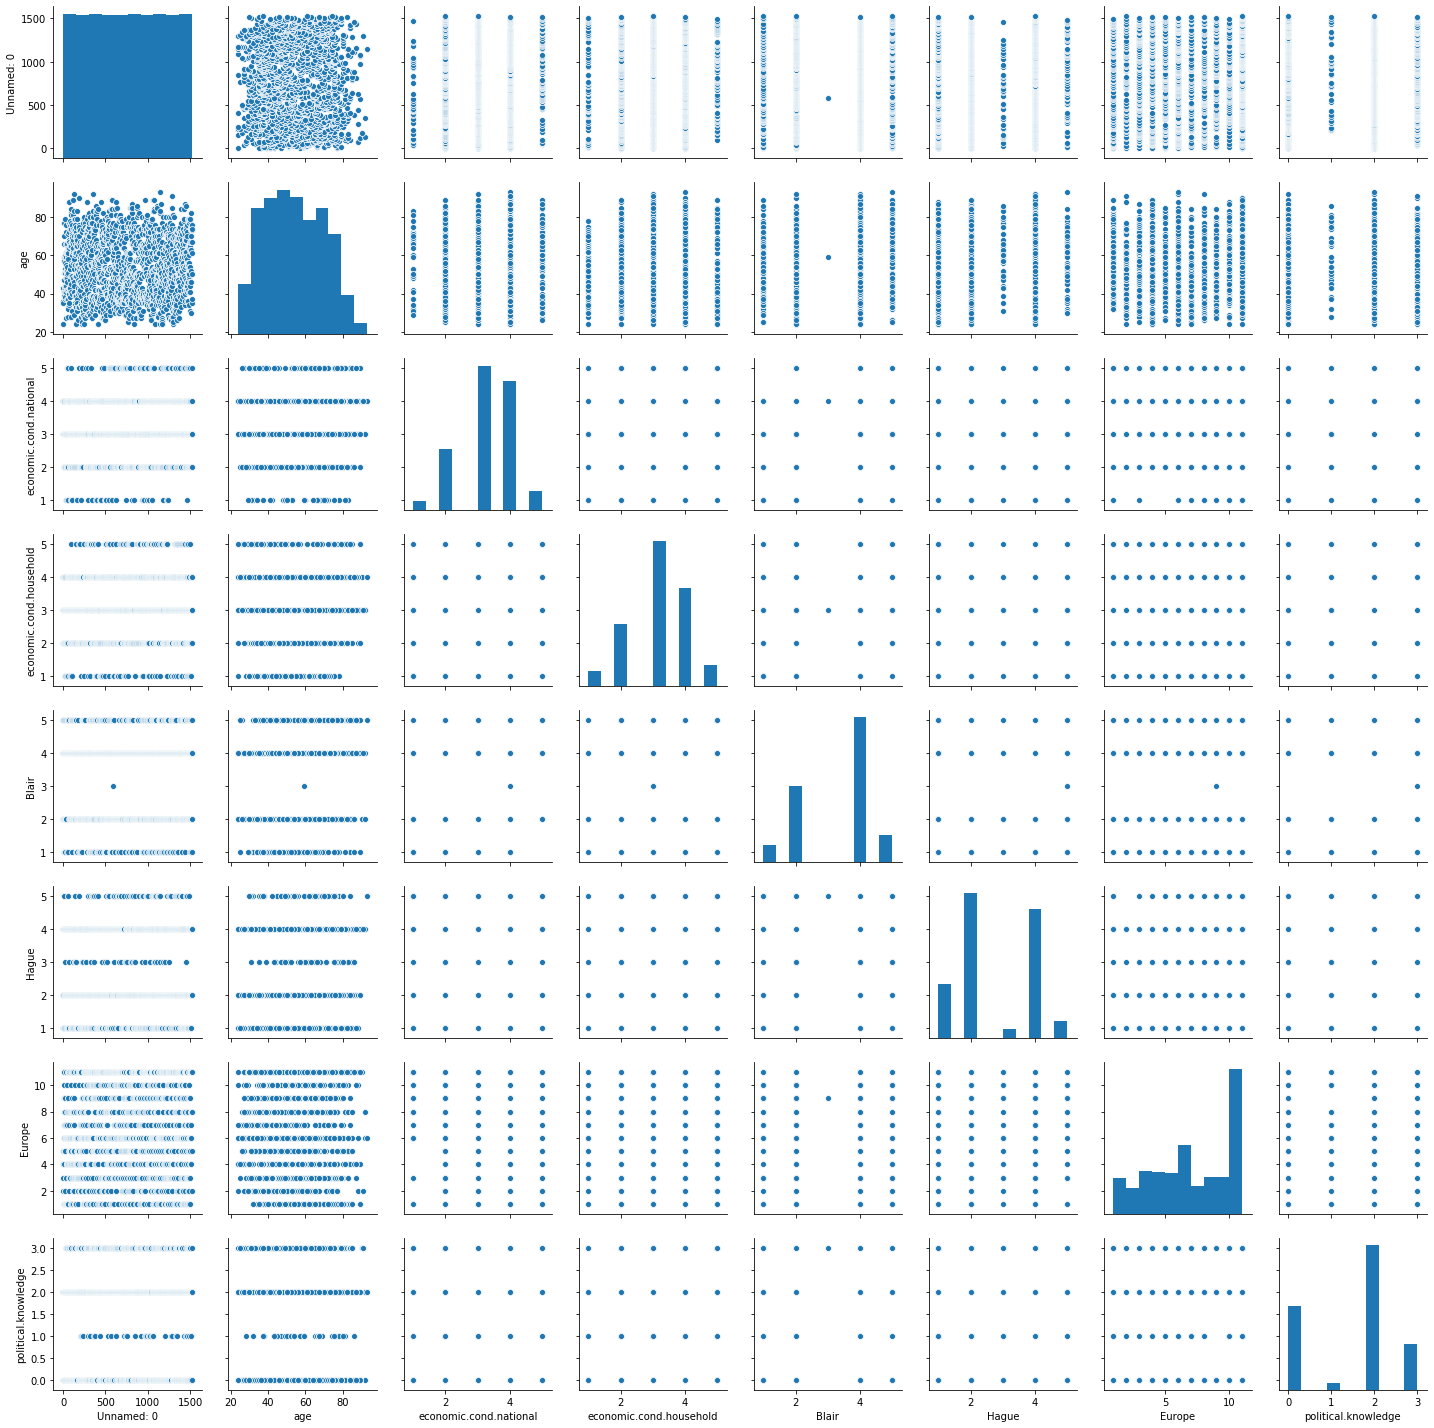

In [66]:
sns.pairplot(df)

In [68]:
df.cov()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Unnamed: 0,193929.166667,35.476378,27.887139,14.704724,0.828740,0.152887,55.498688,1.185696
age,35.476378,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301
economic.cond.national,27.887139,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546
economic.cond.household,14.704724,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091
Blair,0.828740,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621
Hague,0.152887,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469
Europe,55.498688,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285
political.knowledge,1.185696,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571


In [67]:
df.corr()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Unnamed: 0,1.000000,0.005128,0.071882,0.035907,0.001602,0.000282,0.038218,0.002485
age,0.005128,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.071882,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,0.035907,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.001602,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.000282,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.038218,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,0.002485,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


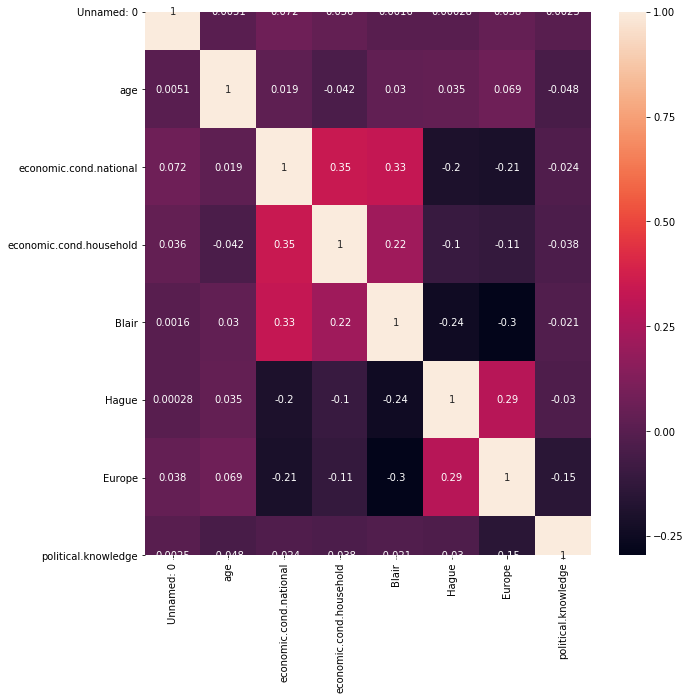

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Data Preparation:

## Encode the data (having string values) for Modelling. Checking for data scaling and performing data Split for train and test sets

In [70]:
## removing the unwanted column

In [113]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


## Having two seperate datasets for dependent and independent variables

In [115]:
x = df.drop('vote', axis=1)
y = df.pop('vote')

In [116]:
## encoding y variable
y = pd.Categorical(y).codes

### On Scaling:

### We have the column 'age'. Since age is a bigger number when compared to other columns where the values are in a range, we need to scale the 'age' column. We can do minmaxscaling

In [117]:
features_to_normalize = ['age']
x[features_to_normalize] = x[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [118]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,3,3,4,1,2,2,female
1,0.173913,4,4,4,4,5,2,male
2,0.159420,4,4,5,2,3,2,male
3,0.000000,4,2,2,1,4,0,female
4,0.246377,2,2,1,1,6,2,male


In [119]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
age                        1525 non-null float64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: float64(1), int64(6), object(1)
memory usage: 95.4+ KB


In [120]:
categorical = ['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']

In [121]:
for i in categorical:
    x[i]=x[i].astype("object")

In [122]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
age                        1525 non-null float64
economic.cond.national     1525 non-null object
economic.cond.household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Europe                     1525 non-null object
political.knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: float64(1), object(7)
memory usage: 95.4+ KB


In [123]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,3,3,4,1,2,2,female
1,0.173913,4,4,4,4,5,2,male
2,0.159420,4,4,5,2,3,2,male
3,0.000000,4,2,2,1,4,0,female
4,0.246377,2,2,1,1,6,2,male


In [124]:
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)

In [125]:
x.head()

,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,Blair_2,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,0.275362,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.173913,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.159420,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.000000,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.246377,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Modelling:

## Applying Logistic Regression and LDA (linear discriminant analysis).

In [127]:
logit = LogisticRegression()

In [128]:
logit.fit(x_train, y_train)

LogisticRegression()

In [129]:
logit_predit_train = logit.predict(x_train)
logit_predit_test = logit.predict(x_test)

In [158]:
lda = LinearDiscriminantAnalysis()

In [159]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [160]:
lda_predict_train = lda.predict(x_train)
lda_predict_test = lda.predict(x_test)

## Applying KNN Model, Naïve Bayes Model and support vector machine (SVM) model. Interpret the results.

In [161]:
knn = KNeighborsClassifier()

In [162]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [163]:
knn_predict_train = knn.predict(x_train)
knn_predict_test = knn.predict(x_test)

In [164]:
nb = GaussianNB()

In [165]:
nb.fit(x_train, y_train)

GaussianNB()

In [166]:
nb_predict_train = nb.predict(x_train)
nb_predict_test = nb.predict(x_test)

In [233]:
svm1 = svm.SVC(probability=True)

In [234]:
svm1.fit(x_train, y_train)

SVC(probability=True)

In [235]:
svm_predict_train = svm1.predict(x_train)
svm_predict_test = svm1.predict(x_test)

## Performing Model Tuning, Bagging (Random Forest) and Boosting.

## Using GridSearchCV for tuning the bagging model random forest

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid_rf = {
    'max_depth': [11, 13, 15],
    'max_features': [8, 10, 12],
    'min_samples_leaf': [40, 70, 100],
    'min_samples_split': [120, 210, 300],
    'n_estimators': [300, 500],
    'random_state': [0]
}

rfcl = RandomForestClassifier()

In [144]:
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rf, cv = 3)

In [145]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [11, 13, 15], 'max_features': [8, 10, 12],
                         'min_samples_leaf': [40, 70, 100],
                         'min_samples_split': [120, 210, 300],
                         'n_estimators': [300, 500], 'random_state': [0]})

In [170]:
grid_search_rf.best_params_

{'max_depth': 11,
 'max_features': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 120,
 'n_estimators': 300,
 'random_state': 0}

In [171]:
best_grid_rf = grid_search_rf.best_estimator_

In [172]:
best_grid_rf

RandomForestClassifier(max_depth=11, max_features=8, min_samples_leaf=40,
                       min_samples_split=120, n_estimators=300, random_state=0)

In [173]:
rf_predict_train = best_grid_rf.predict(x_train)
rf_predict_test = best_grid_rf.predict(x_test)

In [174]:
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
xgb_predict_train = XGB_model.predict(x_train)
xgb_predict_test = XGB_model.predict(x_test)

In [176]:
    ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [177]:
ada_predict_train = ADB_model.predict(x_train)
ada_predict_test = ADB_model.predict(x_test)

## Performance Metrics: Checking the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. 
## Final Model: Compare the models and write inference which model is best/optimized.


## For Logistic regression:

In [203]:
print(accuracy_score(y_train, logit_predit_train))
print(accuracy_score(y_test, logit_predit_test))
print(confusion_matrix(y_train, logit_predit_train ))
print(confusion_matrix(y_test, logit_predit_test ))
print(classification_report(y_train, logit_predit_train))
print(classification_report(y_test, logit_predit_test))
print(roc_auc_score(y_train, logit.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, logit.predict_proba(x_test)[:,1]))

0.851921274601687
0.8231441048034934
[[231  97]
 [ 61 678]]
[[ 90  44]
 [ 37 287]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75       328
           1       0.87      0.92      0.90       739

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       134
           1       0.87      0.89      0.88       324

    accuracy                           0.82       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

0.9022946301858148
0.8813916528468767


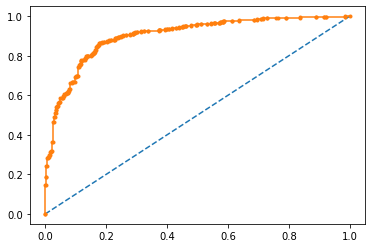

In [204]:
fpr_log_reg_train, tpr_log_reg_train, tresholds_log_reg_train = roc_curve(y_train, logit.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_log_reg_train, tpr_log_reg_train, marker='.')

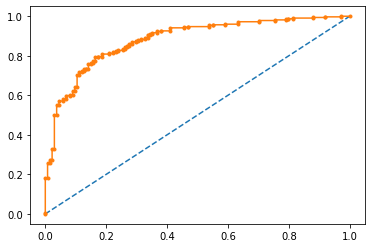

In [205]:
fpr_log_reg_test, tpr_log_reg_test, tresholds_log_reg_test = roc_curve(y_test, logit.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_log_reg_test, tpr_log_reg_test, marker='.')

## For LDA:

In [206]:
print(accuracy_score(y_train, lda_predict_train))
print(accuracy_score(y_test, lda_predict_test))
print(confusion_matrix(y_train, lda_predict_train ))
print(confusion_matrix(y_test, lda_predict_test ))
print(classification_report(y_train, lda_predict_train))
print(classification_report(y_test, lda_predict_test))
print(roc_auc_score(y_train, lda.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, lda.predict_proba(x_test)[:,1]))

0.8472352389878163
0.8253275109170306
[[233  95]
 [ 68 671]]
[[ 94  40]
 [ 40 284]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       328
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       134
           1       0.88      0.88      0.88       324

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

0.9016056635532528
0.8782822001105582


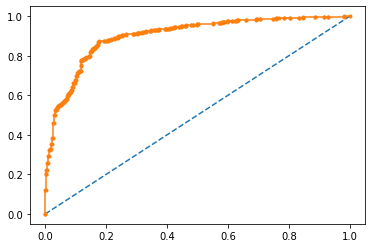

In [207]:
fpr_lda_train, tpr_lda_train, tresholds_lda_train = roc_curve(y_train, lda.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_lda_train, tpr_lda_train, marker='.')

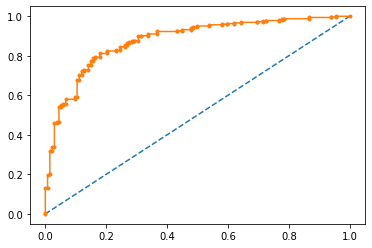

In [208]:
fpr_lda_test, tpr_lda_test, tresholds_lda_test = roc_curve(y_test, lda.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_lda_test, tpr_lda_test, marker='.')

## For KNN:

In [209]:
print(accuracy_score(y_train, knn_predict_train))
print(accuracy_score(y_test, knn_predict_test))
print(confusion_matrix(y_train, knn_predict_train ))
print(confusion_matrix(y_test, knn_predict_test ))
print(classification_report(y_train, knn_predict_train))
print(classification_report(y_test, knn_predict_test))
print(roc_auc_score(y_train, knn.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, knn.predict_proba(x_test)[:,1]))

0.8566073102155577
0.8034934497816594
[[235  93]
 [ 60 679]]
[[ 89  45]
 [ 45 279]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       328
           1       0.88      0.92      0.90       739

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       134
           1       0.86      0.86      0.86       324

    accuracy                           0.80       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458

0.9236340308260998
0.8496406854615809


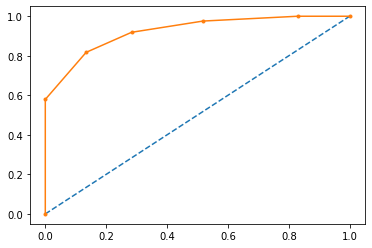

In [210]:
fpr_knn_train, tpr_knn_train, tresholds_knn_train = roc_curve(y_train, knn.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_knn_train, tpr_knn_train, marker='.')

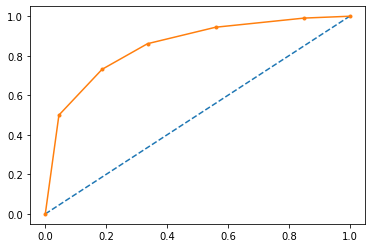

In [211]:
fpr_knn_test, tpr_knn_test, tresholds_knn_test = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_knn_test, tpr_knn_test, marker='.')

## For Naive Bayes:

In [212]:
print(accuracy_score(y_train, nb_predict_train))
print(accuracy_score(y_test, nb_predict_test))
print(confusion_matrix(y_train, nb_predict_train ))
print(confusion_matrix(y_test, nb_predict_test ))
print(classification_report(y_train, nb_predict_train))
print(classification_report(y_test, nb_predict_test))
print(roc_auc_score(y_train, nb.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, nb.predict_proba(x_test)[:,1]))

0.7853795688847235
0.7794759825327511
[[131 197]
 [ 32 707]]
[[ 49  85]
 [ 16 308]]
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       328
           1       0.78      0.96      0.86       739

    accuracy                           0.79      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.79      0.76      1067

              precision    recall  f1-score   support

           0       0.75      0.37      0.49       134
           1       0.78      0.95      0.86       324

    accuracy                           0.78       458
   macro avg       0.77      0.66      0.68       458
weighted avg       0.77      0.78      0.75       458

0.8451660945905806
0.822312050856827


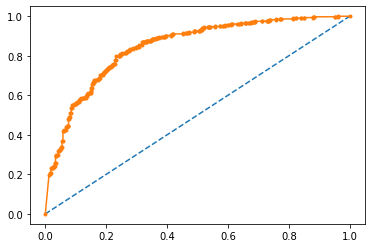

In [213]:
fpr_nb_train, tpr_nb_train, tresholds_nb_train = roc_curve(y_train, nb.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_nb_train, tpr_nb_train, marker='.')

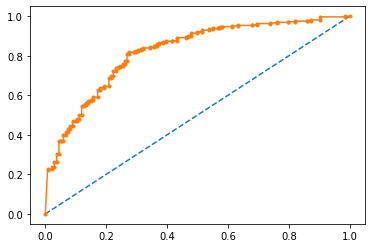

In [214]:
fpr_nb_test, tpr_nb_test, tresholds_nb_test = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_nb_test, tpr_nb_test, marker='.')

## For SVM:

In [237]:
print(accuracy_score(y_train, svm_predict_train))
print(accuracy_score(y_test, svm_predict_test))
print(confusion_matrix(y_train, svm_predict_train ))
print(confusion_matrix(y_test, svm_predict_test ))
print(classification_report(y_train, svm_predict_train))
print(classification_report(y_test, svm_predict_test))
print(roc_auc_score(y_train, svm1.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, svm1.predict_proba(x_test)[:,1]))

0.8884723523898782
0.834061135371179
[[247  81]
 [ 38 701]]
[[ 93  41]
 [ 35 289]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       328
           1       0.90      0.95      0.92       739

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       134
           1       0.88      0.89      0.88       324

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458

0.9463719924749991
0.8682628524046435


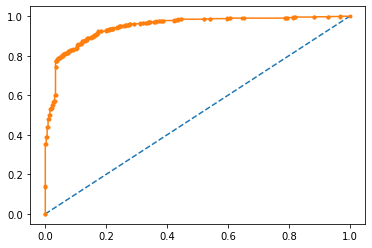

In [238]:
fpr_svm_train, tpr_svm_train, tresholds_svm_train = roc_curve(y_train, svm1.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_svm_train, tpr_svm_train, marker='.')

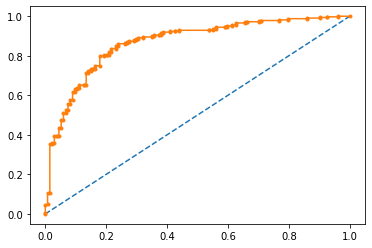

In [239]:
fpr_svm_test, tpr_svm_test, tresholds_svm_test = roc_curve(y_test, svm1.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, marker='.')

## Bagging : Random Forest:-

In [229]:
print(accuracy_score(y_train, rf_predict_train))
print(accuracy_score(y_test, rf_predict_test))
print(confusion_matrix(y_train, rf_predict_train ))
print(confusion_matrix(y_test, rf_predict_test ))
print(classification_report(y_train, rf_predict_train))
print(classification_report(y_test, rf_predict_test))
print(roc_auc_score(y_train, best_grid_rf.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, best_grid_rf.predict_proba(x_test)[:,1]))

0.7750702905342081
0.7663755458515283
[[129 199]
 [ 41 698]]
[[ 45  89]
 [ 18 306]]
              precision    recall  f1-score   support

           0       0.76      0.39      0.52       328
           1       0.78      0.94      0.85       739

    accuracy                           0.78      1067
   macro avg       0.77      0.67      0.69      1067
weighted avg       0.77      0.78      0.75      1067

              precision    recall  f1-score   support

           0       0.71      0.34      0.46       134
           1       0.77      0.94      0.85       324

    accuracy                           0.77       458
   macro avg       0.74      0.64      0.65       458
weighted avg       0.76      0.77      0.74       458

0.8431053830159412
0.8308112216694308


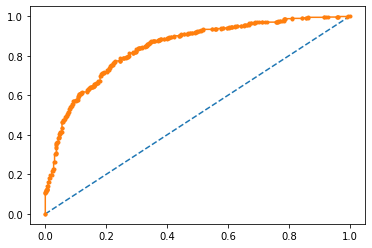

In [218]:
fpr_rf_train, tpr_rf_train, tresholds_rf_train = roc_curve(y_train, best_grid_rf.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_rf_train, tpr_rf_train, marker='.')

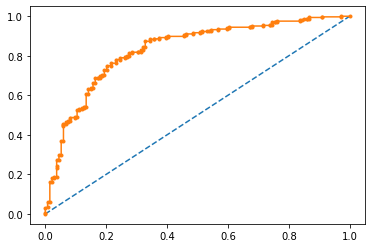

In [219]:
fpr_rf_test, tpr_rf_test, tresholds_rf_test = roc_curve(y_test, best_grid_rf.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_rf_test, tpr_rf_test, marker='.')

## Boosting : XGBoost:-

In [220]:
print(accuracy_score(y_train, xgb_predict_train))
print(accuracy_score(y_test, xgb_predict_test))
print(confusion_matrix(y_train, xgb_predict_train ))
print(confusion_matrix(y_test, xgb_predict_test ))
print(classification_report(y_train, xgb_predict_train))
print(classification_report(y_test, xgb_predict_test))
print(roc_auc_score(y_train, XGB_model.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, XGB_model.predict_proba(x_test)[:,1]))

0.8687910028116214
0.8165938864628821
[[238  90]
 [ 50 689]]
[[ 90  44]
 [ 40 284]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       328
           1       0.88      0.93      0.91       739

    accuracy                           0.87      1067
   macro avg       0.86      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       134
           1       0.87      0.88      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458

0.9223901778936598
0.8448267919660954


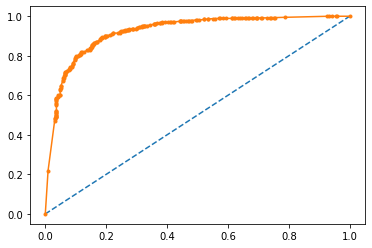

In [226]:
fpr_xgb_train, tpr_xgb_train, tresholds_xgb_train = roc_curve(y_train, XGB_model.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_xgb_train, tpr_xgb_train, marker='.')

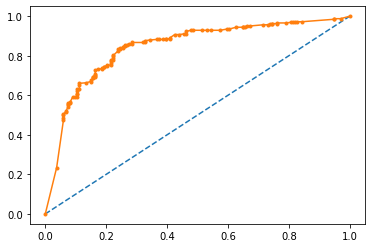

In [222]:
fpr_xgb_test, tpr_xgb_test, tresholds_xgb_test = roc_curve(y_test, XGB_model.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_xgb_test, tpr_xgb_test, marker='.')

## Boosting : Adaboost:-

In [223]:
print(accuracy_score(y_train, ada_predict_train))
print(accuracy_score(y_test, ada_predict_test))
print(confusion_matrix(y_train, ada_predict_train ))
print(confusion_matrix(y_test, ada_predict_test ))
print(classification_report(y_train, ada_predict_train))
print(classification_report(y_test, ada_predict_test))
print(roc_auc_score(y_train, ADB_model.predict_proba(x_train)[:,1]))
print(roc_auc_score(y_test, ADB_model.predict_proba(x_test)[:,1]))

0.8509840674789129
0.8318777292576419
[[233  95]
 [ 64 675]]
[[ 92  42]
 [ 35 289]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       328
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       134
           1       0.87      0.89      0.88       324

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

0.9113172051882901
0.8861825133591301


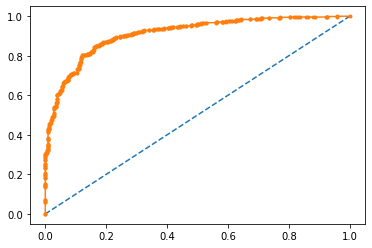

In [224]:
fpr_ada_train, tpr_ada_train, tresholds_ada_train = roc_curve(y_train, ADB_model.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_ada_train, tpr_ada_train, marker='.')

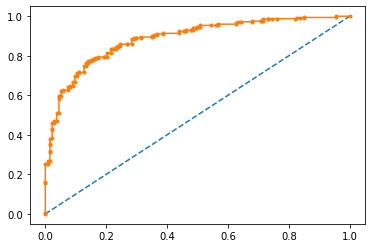

In [225]:
fpr_ada_test, tpr_ada_test, tresholds_ada_test = roc_curve(y_test, ADB_model.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_ada_test, tpr_ada_test, marker='.')

## Inference:

## Looking at the performance metrics, all the models are doing decently good

## The models on support vector machine, XGBoost and Adaboost seem to be performing slightly better with accuracy scores around 81-83%

## The logistic regression, LDA and KNN models are also performing good with accuracy scores around of 82%, 82% and 80% respectively

## Naive Bayes and Random Forest Classifier are having accuracy scores around 75 percent respectively. While other models seem to be doing better with the accuracy scores above 80 percent

## In all of the models, we can see that the recallsfor Labor are on higher when compared to the recall for conservative.

## Recall for conservative is very low for the models on Random Forest and Naive Bayes, while other models give decent numbers